In [1]:
#Preprocessing
import pandas as pd
import numpy as np
import string
import re
import spacy
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from cleantext import clean
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Model Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import accuracy_score
from sklearn import model_selection

import time

import warnings
warnings.filterwarnings('ignore')

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Read Training Dataset 

In [2]:
train=pd.read_csv("train.csv",encoding="unicode_escape")
test=pd.read_csv("iPhoneTest.csv")
print("Initial :")

print('Train')
print('------------------')
print(train.head())

print('\nTest')
print('------------------')
print(test.head())

Initial :
Train
------------------
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan    

### Attribute Selection

In [3]:
print('Attribute Selection :')
print('\nTrain')
print('------------------')
train=train[['text','sentiment']]

print(train.head())


print('\nTest')
print('------------------')
test=test[['text','sentiment']]
print('Attribute Selection :')
print(test.head())

Attribute Selection :

Train
------------------
                                                text sentiment
0                I`d have responded, if I were going   neutral
1      Sooo SAD I will miss you here in San Diego!!!  negative
2                          my boss is bullying me...  negative
3                     what interview! leave me alone  negative
4   Sons of ****, why couldn`t they put them on t...  negative

Test
------------------
Attribute Selection :
                                                text sentiment
0                Anyone iPhone 14 or Pro?\n\n#iPhone   neutral
1  I remember the first time i bought a smart Pho...  positive
2  🧵 iPhone 14 Pro Max, my take:\n\nAfter using t...  positive
3  I have started saving for the next #iPhone wha...   neutral
4  Mf #iphone after this fucking update everythin...  negative


### Drop rows with null values 

In [4]:
train.isnull().sum()
train=train.dropna(axis=0)

test.isnull().sum()
test=test.dropna(axis=0)

### Convert to lowercase 

In [5]:
print('Lowercase')
print('\nTrain')
print('------------------')
train['text']=train['text'].str.lower()
print(train['text'].head())

print('\nTest')
print('------------------')
test['text']=test['text'].str.lower()
print('Lowercase')
print(test['text'].head())

Lowercase

Train
------------------
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

Test
------------------
Lowercase
0                  anyone iphone 14 or pro?\n\n#iphone
1    i remember the first time i bought a smart pho...
2    🧵 iphone 14 pro max, my take:\n\nafter using t...
3    i have started saving for the next #iphone wha...
4    mf #iphone after this fucking update everythin...
Name: text, dtype: object


### Remove URL

In [6]:
print('Remove URL')
print('\nTrain')
print('------------------')
train['text'] = train['text'].replace('((www.[^\s]+)|(https?://[^\s]+))', '', regex = True)
print("Remove URL: ")
print(train['text'].head())


print('\nTest')
print('------------------')
test['text'] = test['text'].replace('((www.[^\s]+)|(https?://[^\s]+))', '', regex = True)
print(test['text'].head())

Remove URL

Train
------------------
Remove URL: 
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

Test
------------------
0                  anyone iphone 14 or pro?\n\n#iphone
1    i remember the first time i bought a smart pho...
2    🧵 iphone 14 pro max, my take:\n\nafter using t...
3    i have started saving for the next #iphone wha...
4    mf #iphone after this fucking update everythin...
Name: text, dtype: object


### Remove Emoji 

In [7]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

print('Remove Emoji')
print('\nTrain')
print('------------------')
train['text'] = train['text'].apply(lambda text: remove_emojis(text))
print(train['text'].head())


print('\nTest')
print('------------------')
test['text'] = test['text'].apply(lambda text: remove_emojis(text))
print(test['text'].head())

Remove Emoji

Train
------------------
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

Test
------------------
0                  anyone iphone 14 or pro?\n\n#iphone
1    i remember the first time i bought a smart pho...
2     iphone 14 pro max, my take:\n\nafter using th...
3    i have started saving for the next #iphone wha...
4    mf #iphone after this fucking update everythin...
Name: text, dtype: object


### Remove @user 

In [8]:
print('Remove @ User')
print('\nTrain')
print('------------------')
train['text'] = train['text'].replace('(@[^\s]+)', '', regex = True)
print("Remove @user: ")
print(train['text'].head())

print('\nTest')
print('------------------')
test['text'] = test['text'].replace('(@[^\s]+)', '', regex = True)
print("Remove @user: ")
print(test['text'].head())

Remove @ User

Train
------------------
Remove @user: 
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

Test
------------------
Remove @user: 
0                  anyone iphone 14 or pro?\n\n#iphone
1    i remember the first time i bought a smart pho...
2     iphone 14 pro max, my take:\n\nafter using th...
3    i have started saving for the next #iphone wha...
4    mf #iphone after this fucking update everythin...
Name: text, dtype: object


### Remove # keyword 

In [9]:
print('Remove #')
print('\nTrain')
print('------------------')
train['text'] = train['text'].replace('(#[^\s]+)', '', regex = True)
print("Remove #keyword: ")
print(train['text'].head())


print('\nTest')
print('------------------')
test['text'] = test['text'].replace('(#[^\s]+)', '', regex = True)
print("Remove #keyword: ")
print(test['text'].head())

Remove #

Train
------------------
Remove #keyword: 
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

Test
------------------
Remove #keyword: 
0                         anyone iphone 14 or pro?\n\n
1    i remember the first time i bought a smart pho...
2     iphone 14 pro max, my take:\n\nafter using th...
3     i have started saving for the next  whatever pro
4    mf  after this fucking update everything has b...
Name: text, dtype: object


### Remove numerical characters 

In [10]:
print('Remove numerical characters')
print('\nTrain')
print('------------------')
train['text'] = train['text'].replace('[0-9]+', '', regex = True)
print(train['text'].head())

print('\nTest')
print('------------------')
test['text'] = test['text'].replace('[0-9]+', '', regex = True)
print("Remove numbers: ")
print(test['text'].head())

Remove numerical characters

Train
------------------
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

Test
------------------
Remove numbers: 
0                           anyone iphone  or pro?\n\n
1    i remember the first time i bought a smart pho...
2     iphone  pro max, my take:\n\nafter using the ...
3     i have started saving for the next  whatever pro
4    mf  after this fucking update everything has b...
Name: text, dtype: object


### Remove punctuation 

In [11]:
print('Remove punctuation')
print('\nTrain')
print('------------------')
train['text'] = train['text'].str.translate(str.maketrans('', '', string.punctuation))
print("Remove punctuation: ")
print(train['text'].head())

print('\nTest')
print('------------------')
test['text'] = test['text'].str.translate(str.maketrans('', '', string.punctuation))
print("Remove punctuation: ")
print(test['text'].head())

Remove punctuation

Train
------------------
Remove punctuation: 
0                    id have responded if i were going
1           sooo sad i will miss you here in san diego
2                               my boss is bullying me
3                        what interview leave me alone
4     sons of  why couldnt they put them on the rel...
Name: text, dtype: object

Test
------------------
Remove punctuation: 
0                            anyone iphone  or pro\n\n
1    i remember the first time i bought a smart pho...
2     iphone  pro max my take\n\nafter using the ne...
3     i have started saving for the next  whatever pro
4    mf  after this fucking update everything has b...
Name: text, dtype: object


### Remove repeated keywords

In [12]:
print('Remove repeated keywords :')
print('\nTrain')
print('------------------')
train['text'] = train['text'].replace(r'(.)\1+', r'\1\1', regex = True)
print(train['text'].head())

print('\nTest')
print('------------------')
test['text'] = test['text'].replace(r'(.)\1+', r'\1\1', regex = True)
print(test['text'].head())

Remove repeated keywords :

Train
------------------
0                    id have responded if i were going
1            soo sad i will miss you here in san diego
2                               my boss is bullying me
3                        what interview leave me alone
4     sons of  why couldnt they put them on the rel...
Name: text, dtype: object

Test
------------------
0                            anyone iphone  or pro\n\n
1    i remember the first time i bought a smart pho...
2     iphone  pro max my take\n\nafter using the ne...
3     i have started saving for the next  whatever pro
4    mf  after this fucking update everything has b...
Name: text, dtype: object


###  Remove Stopwords 

In [13]:
stop_words = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

print("Remove stopwords: ")
print('\nTrain')
print('------------------')
train['text'] = train['text'].apply(lambda text: cleaning_stopwords(text))
print(train['text'].head())

print('\nTest')
print('------------------')
test['text'] = test['text'].apply(lambda text: cleaning_stopwords(text))
print(test['text'].head())

Remove stopwords: 

Train
------------------
0                          id responded going
1                      soo sad miss san diego
2                               boss bullying
3                       interview leave alone
4    sons couldnt put releases already bought
Name: text, dtype: object

Test
------------------
0                                    anyone iphone pro
1    remember first time bought smart phone g showe...
2    iphone pro max take using new i’ve noticed int...
3                     started saving next whatever pro
4    mf fucking update everything become slow can’t...
Name: text, dtype: object


### Tokenization

In [14]:
print("Tokenization: ")
print('\nTrain')
print('------------------')
train['text'] = train['text'].apply(nltk.word_tokenize)
print("Tokenization: ")
print(train['text'].head())


print('\nTest')
print('------------------')
test['text'] = test['text'].apply(nltk.word_tokenize)
print("Tokenization: ")
print(test['text'].head())

Tokenization: 

Train
------------------
Tokenization: 
0                             [id, responded, going]
1                       [soo, sad, miss, san, diego]
2                                   [boss, bullying]
3                          [interview, leave, alone]
4    [sons, couldnt, put, releases, already, bought]
Name: text, dtype: object

Test
------------------
Tokenization: 
0                                [anyone, iphone, pro]
1    [remember, first, time, bought, smart, phone, ...
2    [iphone, pro, max, take, using, new, i, ’, ve,...
3               [started, saving, next, whatever, pro]
4    [mf, fucking, update, everything, become, slow...
Name: text, dtype: object


In [15]:
print('\nTrain')
print('------------------')
print(train.head())

print('\nTest')
print('------------------')
print(test.head())


Train
------------------
                                              text sentiment
0                           [id, responded, going]   neutral
1                     [soo, sad, miss, san, diego]  negative
2                                 [boss, bullying]  negative
3                        [interview, leave, alone]  negative
4  [sons, couldnt, put, releases, already, bought]  negative

Test
------------------
                                                text sentiment
0                              [anyone, iphone, pro]   neutral
1  [remember, first, time, bought, smart, phone, ...  positive
2  [iphone, pro, max, take, using, new, i, ’, ve,...  positive
3             [started, saving, next, whatever, pro]   neutral
4  [mf, fucking, update, everything, become, slow...  negative


### Label Encoding 

In [16]:
train['sentiment'] = train['sentiment'].map({"positive": 1, "neutral": 0, "negative": -1})
test['sentiment'] = test['sentiment'].map({"positive": 1, "neutral": 0, "negative": -1})
print('\nTrain')
print('------------------')
print(train.head())

print('\nTest')
print('------------------')
print(test.head())


Train
------------------
                                              text  sentiment
0                           [id, responded, going]          0
1                     [soo, sad, miss, san, diego]         -1
2                                 [boss, bullying]         -1
3                        [interview, leave, alone]         -1
4  [sons, couldnt, put, releases, already, bought]         -1

Test
------------------
                                                text  sentiment
0                              [anyone, iphone, pro]          0
1  [remember, first, time, bought, smart, phone, ...          1
2  [iphone, pro, max, take, using, new, i, ’, ve,...          1
3             [started, saving, next, whatever, pro]          0
4  [mf, fucking, update, everything, become, slow...         -1


In [17]:
print('\nTrain')
print('------------------')
print(train['sentiment'].value_counts())

print('\nTest')
print('------------------')
print(test['sentiment'].value_counts())


Train
------------------
 0    11117
 1     8582
-1     7781
Name: sentiment, dtype: int64

Test
------------------
-1    126
 1    107
 0     77
Name: sentiment, dtype: int64


### POS 

In [18]:
print("POS : ")
print('\nTrain')
print('------------------')
train['text'] = train['text'].apply(nltk.pos_tag)
print("POS tagging: ")
print(train['text'].head())

print('\nTest')
print('------------------')
test['text'] = test['text'].apply(nltk.pos_tag)
print("POS tagging: ")
print(test['text'].head())

POS : 

Train
------------------
POS tagging: 
0           [(id, NN), (responded, VBD), (going, VBG)]
1    [(soo, JJ), (sad, JJ), (miss, NN), (san, NN), ...
2                        [(boss, IN), (bullying, VBG)]
3         [(interview, NN), (leave, VBP), (alone, RB)]
4    [(sons, NNS), (couldnt, VBP), (put, VBN), (rel...
Name: text, dtype: object

Test
------------------
POS tagging: 
0              [(anyone, NN), (iphone, CD), (pro, NN)]
1    [(remember, VB), (first, JJ), (time, NN), (bou...
2    [(iphone, JJ), (pro, JJ), (max, NNS), (take, V...
3    [(started, VBN), (saving, VBG), (next, JJ), (w...
4    [(mf, NN), (fucking, VBG), (update, JJ), (ever...
Name: text, dtype: object


### Lemmatization

In [19]:
def get_wordnet_pos(treebank_pos):
    if treebank_pos.startswith('J'):
        return wordnet.ADJ
    elif treebank_pos.startswith('V'):
        return wordnet.VERB
    elif treebank_pos.startswith('N'):
        return wordnet.NOUN
    elif treebank_pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatization(text):
    lemmatized_tokens = []

    for i in range(len(text)):
        word, pos = text[i]
        
        lemmatized_tokens.append(nltk.WordNetLemmatizer().lemmatize(word, get_wordnet_pos(pos)))
        
    return " ".join(lemmatized_tokens)

print("Lemmatization : ")
print('\nTrain')
print('------------------')
train['text'] = train['text'].apply(lambda text: lemmatization(text))
print(train['text'].head())


print('\nTest')
print('------------------')
test['text'] = test['text'].apply(lambda text: lemmatization(text))
print(test['text'].head())

Lemmatization : 

Train
------------------
0                          id respond go
1                 soo sad miss san diego
2                              bos bully
3                  interview leave alone
4    son couldnt put release already buy
Name: text, dtype: object

Test
------------------
0                                    anyone iphone pro
1    remember first time buy smart phone g show gra...
2    iphone pro max take use new i ’ ve notice inte...
3                         start save next whatever pro
4    mf fuck update everything become slow can ’ t ...
Name: text, dtype: object


### Train Test Split

In [20]:
X_train=train['text']
X_test=test['text']
y_train=train['sentiment']
y_test=test['sentiment']

In [21]:
tfidf_vectorizer= TfidfVectorizer(max_df=0.90, min_df=2,max_features =1000)
X_train = tfidf_vectorizer.fit_transform(X_train) #Tokenize and build vocabulary
X_test = tfidf_vectorizer.transform(X_test) #Tokenize and build vocabulary

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27480, 1000)
(27480,)
(310, 1000)
(310,)


## Individual Model 

#### Confusion Matrix 

In [23]:
def confusion_matrix_evaluation(classifier,y_predicted):
    mat=confusion_matrix(y_test,y_predicted)
    sns.heatmap(mat.T, xticklabels=['Predicted 1','Predicted 0','Predicted -1'],yticklabels=['Actual 1','Actual 0','Actual -1'],
                annot=True, fmt='d', cbar=False,cmap="YlGnBu")
    plt.title('Confusion Matrix for '+classifier)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("confusion_matrix.png")
    plt.show()
    print(classifier+' Classification Report ')
    print('======================================================')
    print(classification_report(y_test,y_predicted))

### Decision Tree 

			 Decision Tree



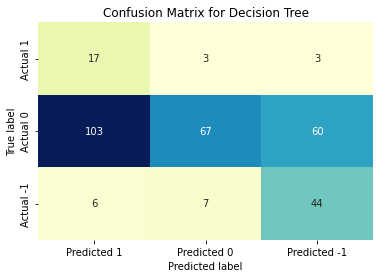

Decision Tree Classification Report 
              precision    recall  f1-score   support

          -1       0.74      0.13      0.23       126
           0       0.29      0.87      0.44        77
           1       0.77      0.41      0.54       107

    accuracy                           0.41       310
   macro avg       0.60      0.47      0.40       310
weighted avg       0.64      0.41      0.39       310

Training Accuracy : 0.6762       ||  0.53 seconds


In [24]:
modelDT = DecisionTreeClassifier(random_state=1,max_leaf_nodes=65,max_depth=100)
start_time = time.time()
modelDT.fit(X_train, y_train)
run_time = time.time() - start_time
predicted_DT=modelDT.predict(X_test)
score_DT=accuracy_score(predicted_DT,y_test)
print('\t\t\t Decision Tree')
print('================================================================\n')
confusion_matrix_evaluation('Decision Tree',predicted_DT)
print('Training Accuracy : %.4f       ||  %4.2f seconds' % (modelDT.score(X_train, y_train),run_time))

###  SVC

			 SVC



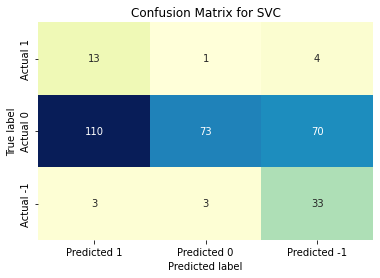

SVC Classification Report 
              precision    recall  f1-score   support

          -1       0.72      0.10      0.18       126
           0       0.29      0.95      0.44        77
           1       0.85      0.31      0.45       107

    accuracy                           0.38       310
   macro avg       0.62      0.45      0.36       310
weighted avg       0.66      0.38      0.34       310

Training Accuracy : 0.6687       ||  35.75 seconds


In [25]:
modelSVC = SVC(C=0.1,kernel='linear',random_state=1)
start_time = time.time()
modelSVC.fit(X_train, y_train)
run_time = time.time() - start_time
predicted_SVC=modelSVC.predict(X_test)

print('\t\t\t SVC')
print('================================================================\n')
confusion_matrix_evaluation('SVC',predicted_SVC)
print('Training Accuracy : %.4f       ||  %4.2f seconds' % (modelSVC.score(X_train, y_train),run_time))

### Logistic Regression

			 Logistic Regression



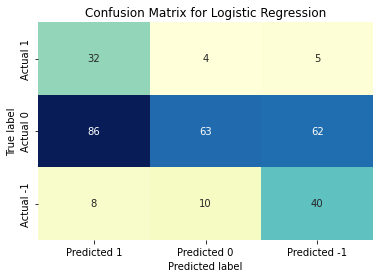

Logistic Regression Classification Report 
              precision    recall  f1-score   support

          -1       0.78      0.25      0.38       126
           0       0.30      0.82      0.44        77
           1       0.69      0.37      0.48       107

    accuracy                           0.44       310
   macro avg       0.59      0.48      0.44       310
weighted avg       0.63      0.44      0.43       310

Training Accuracy : 0.7226       ||  0.21 seconds


In [26]:
modelLR = LogisticRegression(multi_class='multinomial',random_state=1,solver='saga')
start_time = time.time()
modelLR.fit(X_train, y_train)
run_time = time.time() - start_time
predicted_LR=modelLR.predict(X_test)
score_LR=accuracy_score(predicted_LR,y_test)


print('\t\t\t Logistic Regression')
print('================================================================\n')
confusion_matrix_evaluation('Logistic Regression',predicted_LR)
print('Training Accuracy : %.4f       ||  %4.2f seconds' % (modelLR.score(X_train, y_train),run_time))

### Multinomail Naive Bayes 

			 Multinomail Naive Bayes



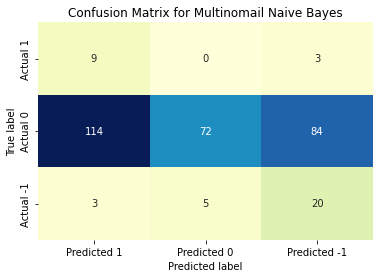

Multinomail Naive Bayes Classification Report 
              precision    recall  f1-score   support

          -1       0.75      0.07      0.13       126
           0       0.27      0.94      0.41        77
           1       0.71      0.19      0.30       107

    accuracy                           0.33       310
   macro avg       0.58      0.40      0.28       310
weighted avg       0.62      0.33      0.26       310

Training Accuracy : 0.6351       ||  0.00 seconds


In [27]:
modelMNB=MultinomialNB(alpha=20)
start_time = time.time()
modelMNB.fit(X_train, y_train)
run_time = time.time() - start_time
predicted_MNB=modelMNB.predict(X_test)
score_MNB=accuracy_score(predicted_MNB,y_test)


print('\t\t\t Multinomail Naive Bayes')
print('================================================================\n')
confusion_matrix_evaluation('Multinomail Naive Bayes',predicted_MNB)
print('Training Accuracy : %.4f       ||  %4.2f seconds' % (modelMNB.score(X_train, y_train),run_time))

### KNN

			 KNN



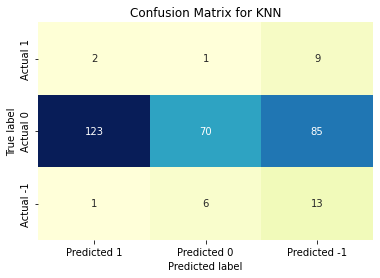

KNN Classification Report 
              precision    recall  f1-score   support

          -1       0.17      0.02      0.03       126
           0       0.25      0.91      0.39        77
           1       0.65      0.12      0.20       107

    accuracy                           0.27       310
   macro avg       0.36      0.35      0.21       310
weighted avg       0.35      0.27      0.18       310

Training Accuracy : 0.5560       ||  0.00 seconds


In [28]:
modelKNN = KNeighborsClassifier(n_neighbors=13)
start_time = time.time()
modelKNN.fit(X_train, y_train)
run_time = time.time() - start_time
predictedKNN=modelKNN.predict(X_test)
score_KNN=accuracy_score(predictedKNN,y_test)


print('\t\t\t KNN')
print('================================================================\n')
confusion_matrix_evaluation('KNN',predictedKNN)
print('Training Accuracy : %.4f       ||  %4.2f seconds' % (modelKNN.score(X_train, y_train),run_time))

### Random Forest 

			 Random Forest



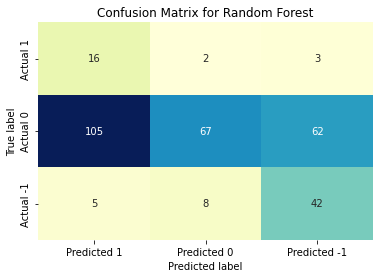

Random Forest Classification Report 
              precision    recall  f1-score   support

          -1       0.76      0.13      0.22       126
           0       0.29      0.87      0.43        77
           1       0.76      0.39      0.52       107

    accuracy                           0.40       310
   macro avg       0.60      0.46      0.39       310
weighted avg       0.64      0.40      0.37       310

Training Accuracy : 0.6782     ||  2.16 seconds


In [29]:
modelRF = RandomForestClassifier(random_state=1,max_leaf_nodes=65,max_depth=100)
start_time = time.time()
modelRF.fit(X_train, y_train)
run_time = time.time() - start_time
predictedRF=modelRF.predict(X_test)
score_RF=accuracy_score(predictedRF,y_test)


print('\t\t\t Random Forest')
print('================================================================\n')
confusion_matrix_evaluation('Random Forest',predictedRF)
print('Training Accuracy : %.4f     ||  %4.2f seconds' % (modelRF.score(X_train, y_train),run_time))

### Gradient Boosting Classifier

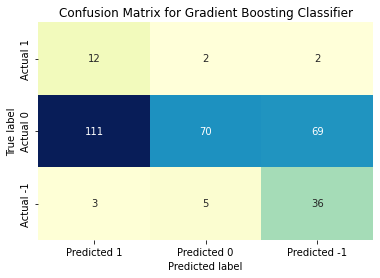

Gradient Boosting Classifier Classification Report 
              precision    recall  f1-score   support

          -1       0.75      0.10      0.17       126
           0       0.28      0.91      0.43        77
           1       0.82      0.34      0.48       107

    accuracy                           0.38       310
   macro avg       0.62      0.45      0.36       310
weighted avg       0.66      0.38      0.34       310

Training Accuracy : 0.6626       ||  10.96 seconds


In [30]:
modelGBC = GradientBoostingClassifier(random_state=1,max_depth=3,max_leaf_nodes=40)
start_time = time.time()
modelGBC.fit(X_train, y_train)
predictedGBC = modelGBC.predict(X_test)
run_time = time.time() - start_time
confusion_matrix_evaluation('Gradient Boosting Classifier',predictedGBC)
print('Training Accuracy : %.4f       ||  %4.2f seconds' % (modelGBC.score(X_train, y_train),run_time))

### Extremely Randomized Trees 

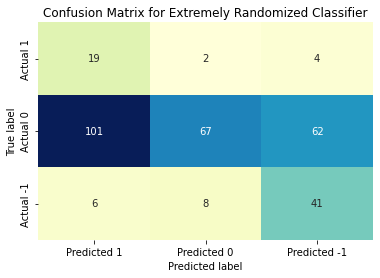

Extremely Randomized Classifier Classification Report 
              precision    recall  f1-score   support

          -1       0.76      0.15      0.25       126
           0       0.29      0.87      0.44        77
           1       0.75      0.38      0.51       107

    accuracy                           0.41       310
   macro avg       0.60      0.47      0.40       310
weighted avg       0.64      0.41      0.39       310

Training Accuracy : 0.6852       ||  1.70 seconds


In [31]:
modelETC = ExtraTreesClassifier(random_state=1,max_depth=80,max_leaf_nodes=100)
start_time = time.time()
modelETC.fit(X_train, y_train)
predictedETC = modelETC.predict(X_test)
run_time = time.time() - start_time
confusion_matrix_evaluation('Extremely Randomized Classifier',predictedETC)
print('Training Accuracy : %.4f       ||  %4.2f seconds' % (modelETC.score(X_train, y_train),run_time))